In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_predictions(
    train_data,
    train_labels,
    test_data,
    test_labels,
    predictions
):
    plt.figure(figsize = (10, 7))
    plt.scatter(train_data, train_labels, c = "b", label = "Traning data")
    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
    plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    plt.legend()

In [4]:
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_test, y_pred)

In [6]:
insurance = pd.read_csv("insurance.csv")

In [7]:
type(insurance)

pandas.core.frame.DataFrame

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## age, sex, bmi, children, smoker, region : feature
## charges : label

In [10]:
import sweetviz as sv

my_report = sv.analyze(insurance)
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
# sex, smoker, region 는 분류형(Categorical) => numerical variables로 바꿔야 합니다!
# one-hot encoding
insurance_one_hot = pd.get_dummies(insurance)

In [12]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [13]:
insurance_one_hot.tail()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,10600.5483,0,1,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,1,0,1,0,1,0,0,0
1335,18,36.85,0,1629.8335,1,0,1,0,0,0,1,0
1336,21,25.80,0,2007.9450,1,0,1,0,0,0,0,1
1337,61,29.07,0,29141.3603,1,0,0,1,0,1,0,0


In [14]:
# feature (X), label (y)로 insurance_one_hot를 분리
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [15]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [16]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [18]:
# dataset에서 feature와 label을 구분!
# 이제 training dataset과 test dataset으로 구분! (split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

In [19]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [20]:
tf.random.set_seed(42)

# 1. 모델을 create
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
insurance_model.compile(
    loss = tf.keras.losses.mae,  
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. 모델을 fit
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 513us/step - loss: 8868.5928 - mae: 8868.5928
Epoch 2/100
34/34 [==============================] - 0s 575us/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 568us/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 574us/step - loss: 7859.4346 - mae: 7859.4346
Epoch 5/100
34/34 [==============================] - 0s 604us/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 570us/step - loss: 7578.0850 - mae: 7578.0850
Epoch 7/100
34/34 [==============================] - 0s 586us/step - loss: 7514.6162 - mae: 7514.6162
Epoch 8/100
34/34 [==============================] - 0s 483us/step - loss: 7694.1343 - mae: 7694.1343
Epoch 9/100
34/34 [==============================] - 0s 574us/step - loss: 7595.9141 - mae: 7595.9141
Epoch 10/100
34/34 [==============================] - 0s 573us/step - loss: 7735.9

In [21]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 996us/step - loss: 8628.2520 - mae: 8628.2520


[8628.251953125, 8628.251953125]

## 모델이 좋지 않다...
## 1. 레이어를 늘려볼까...
## 2. 레이어의 뉴런을 늘려볼까...
## 3. optimizer를 바꿔볼까... (문제집을 바꿔볼까...)

In [25]:
tf.random.set_seed(42)

# 1. 모델을 create
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) # 출력 (output shape가 1개!)
])

# 2. 모델을 compile
insurance_model_2.compile(
    loss = tf.keras.losses.mae,  
    optimizer = tf.keras.optimizers.Adam(), # 많은 문제들에 대해서 시작할 때 사용하기 좋은 optimizer입니다.
    metrics = ["mae"]
)

# 3. 모델을 fit
history = insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 550us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 725us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 815us/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 844us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 734us/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 815us/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 732us/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 695us/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 796us/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 664us/step - lo

In [26]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 997us/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

In [30]:
type(history.history), history.history.keys()

(dict, dict_keys(['loss', 'mae']))

Text(0.5, 0, 'epochs')

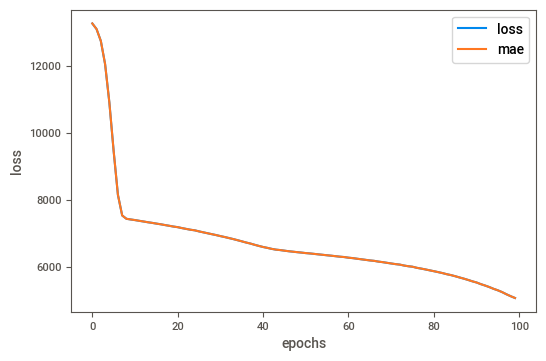

In [31]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [32]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 736us/step - loss: 4989.6201 - mae: 4989.6201
Epoch 2/100
34/34 [==============================] - 0s 918us/step - loss: 4915.0635 - mae: 4915.0635
Epoch 3/100
34/34 [==============================] - 0s 825us/step - loss: 4841.5186 - mae: 4841.5186
Epoch 4/100
34/34 [==============================] - 0s 780us/step - loss: 4761.9351 - mae: 4761.9351
Epoch 5/100
34/34 [==============================] - 0s 669us/step - loss: 4682.8105 - mae: 4682.8105
Epoch 6/100
34/34 [==============================] - 0s 785us/step - loss: 4606.6265 - mae: 4606.6265
Epoch 7/100
34/34 [==============================] - 0s 876us/step - loss: 4510.3018 - mae: 4510.3018
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 4421.1685 - mae: 4421.1685
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 4349.3486 - mae: 4349.3486
Epoch 10/100
34/34 [==============================] - 0s 876us/step - loss: 4256.1733 

In [33]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 997us/step - loss: 3495.8054 - mae: 3495.8054


[3495.805419921875, 3495.805419921875]

Text(0.5, 0, 'epochs')

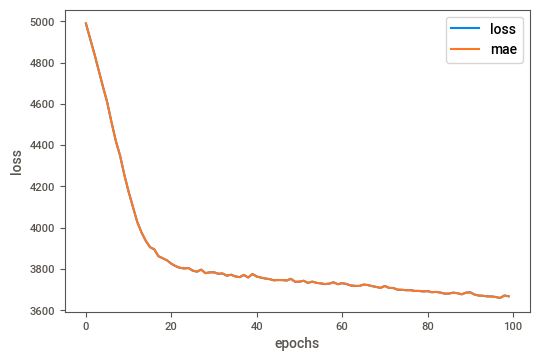

In [35]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [37]:
history_3 = insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 926us/step - loss: 3657.6953 - mae: 3657.6953
Epoch 2/100
34/34 [==============================] - 0s 844us/step - loss: 3651.6062 - mae: 3651.6062
Epoch 3/100
34/34 [==============================] - 0s 785us/step - loss: 3654.1045 - mae: 3654.1045
Epoch 4/100
34/34 [==============================] - 0s 634us/step - loss: 3654.4329 - mae: 3654.4329
Epoch 5/100
34/34 [==============================] - 0s 848us/step - loss: 3653.3511 - mae: 3653.3511
Epoch 6/100
34/34 [==============================] - 0s 809us/step - loss: 3660.8716 - mae: 3660.8716
Epoch 7/100
34/34 [==============================] - 0s 664us/step - loss: 3651.4692 - mae: 3651.4692
Epoch 8/100
34/34 [==============================] - 0s 755us/step - loss: 3648.3267 - mae: 3648.3267
Epoch 9/100
34/34 [==============================] - 0s 664us/step - loss: 3644.4326 - mae: 3644.4326
Epoch 10/100
34/34 [==============================] - 0s 755us/step - loss: 3653.6

In [38]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 498us/step - loss: 3213.5042 - mae: 3213.5042


[3213.504150390625, 3213.504150390625]

Text(0.5, 0, 'epochs')

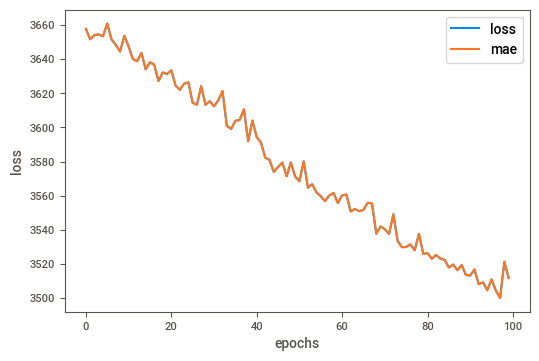

In [39]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization 그리고 standardization)
## 기본 concept : 신경망 (neural network)에 전달하는 data의 값을 0 ~ 1 사이로 맞춰준다!
## normalization : 원래 값들의 범위를 0 ~ 1 사이로 조정 / ex) 0 ~ 100,000 => 0 ~ 1
## standardization : 데이터를 평균이 0인 상태에서 분산으로 조정 
## Computer vision의 경우 : pixel의 값들이 일반적으로 0 ~ 255의 값을 가진다 / pixel_value / 255.

## 1. 처리할 데이터를 숫자로 바꾸어주는 효과 (신경망은 문자열을 다룰 수 없다)
## 2. 우리가 처리할 데이터가 적절한 형태를 가지고 있다는 것을 확인하는 과정 (input shape, output shape)
## 3. feature scaling을 해주는 과정
##    - normalization => min-max 간의 관계를 조정
##    - standardization => 평균이 0 분산이 1인 상태 기준으로 조정
##    일반적으로 신경망에서 normalization을 더 많이 사용합니다. 

In [41]:
insurance = pd.read_csv("insurance.csv")

In [42]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [45]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # 현재 숫자로 되어 있는 값들을 0 ~ 1로 조정해주겠다
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [48]:
type(ct)

sklearn.compose._column_transformer.ColumnTransformer

In [49]:
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [52]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [54]:
type(X_train_normal), X_train_normal

(numpy.ndarray,
 array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]))

In [55]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [56]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [57]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

## 이제 우리는 데이터를 가지고 와서 
## training set과 test set으로 나누고, 문자열 데이터를 숫자로도 바꾸고, normalization까지 완료!

In [59]:
tf.random.set_seed(42)

# 1. 모델을 create
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) # 출력 (output shape가 1개!)
])

# 2. 모델을 compile
insurance_model_3.compile(
    loss = tf.keras.losses.mae,  
    optimizer = tf.keras.optimizers.Adam(), # 많은 문제들에 대해서 시작할 때 사용하기 좋은 optimizer입니다.
    metrics = ["mae"]
)

# 3. 모델을 fit
history_model_3 = insurance_model_3.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 524us/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 785us/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 634us/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 758us/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 604us/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/200
34/34 [==============================] - 0s 876us/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 793us/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 785us/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 785us/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 745us/s

In [60]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 996us/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]